<a href="https://colab.research.google.com/github/rehman2222/AI/blob/main/BTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/AI Assignment/BTC-2017min.csv.zip'

df = pd.read_csv(path)
# df.head()
# df.shape
# df.columns
# df.info
df.describe()

,unix,open,high,low,close,Volume BTC,Volume USD
count,5.255990e+05,525599.000000,525599.000000,525599.000000,525599.000000,525599.000000,5.255990e+05
mean,1.498997e+09,3948.408377,3952.208189,3943.751886,3948.339307,8.939796,4.143441e+04
std,9.103650e+06,3936.757966,3942.382649,3929.589942,3936.695963,20.779163,1.173633e+05
min,1.483229e+09,752.000000,752.810000,751.340000,752.040000,0.000000,0.000000e+00
25%,1.491113e+09,1197.450000,1197.980000,1197.040000,1197.460000,0.348564,7.167660e+02
50%,1.498997e+09,2567.440000,2569.370000,2565.350000,2567.170000,2.575998,7.249086e+03
75%,1.506881e+09,4535.565000,4539.405000,4531.030000,4535.000000,9.416233,3.294400e+04
max,1.514765e+09,19665.760000,19666.000000,19649.960000,19665.750000,1616.060001,5.145939e+06


# Task
Generate line, bar, and pie plots from the data.

## Prepare data for plotting

### Subtask:
Select and transform the data into a format suitable for plotting each type of graph (line, bar, and pie).


**Reasoning**:
Convert the 'date' column to datetime objects, select data for the line plot, and prepare data for bar and pie plots by aggregating on a relevant column or creating categories if necessary. Since 'symbol' is the only category, I will aggregate by resampling the data to a daily frequency and calculate the mean close price for the bar and pie plots.



In [18]:
df['date'] = pd.to_datetime(df['date'])

# Data for line plot (resampled to daily)
line_plot_df = df.set_index('date')['close'].resample('D').mean().reset_index()

# Data for bar and pie plot (mean close price per day)
bar_pie_df = df.set_index('date')['close'].resample('D').mean().reset_index()

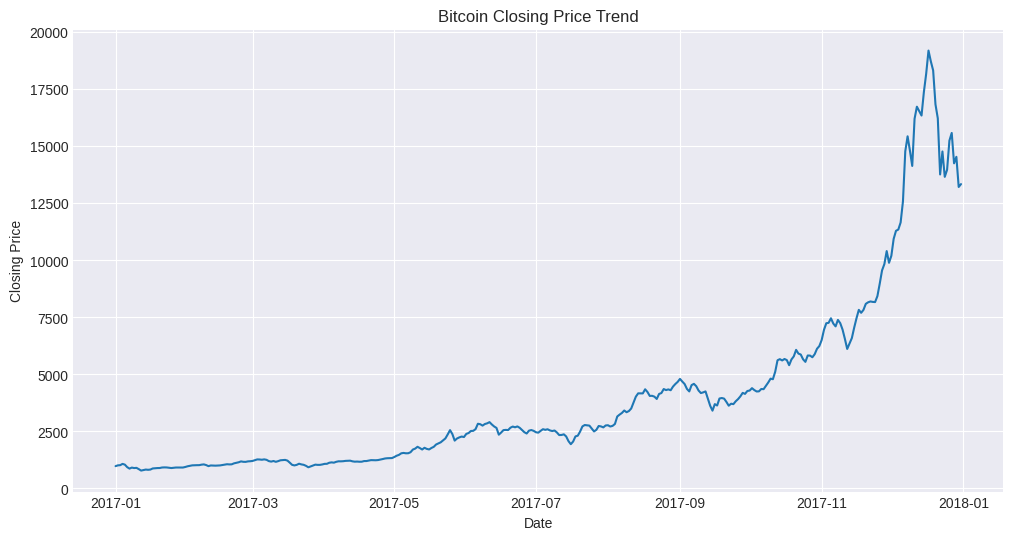

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(line_plot_df['date'], line_plot_df['close'])
plt.title("Bitcoin Closing Price Trend")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.grid(True)
plt.show()

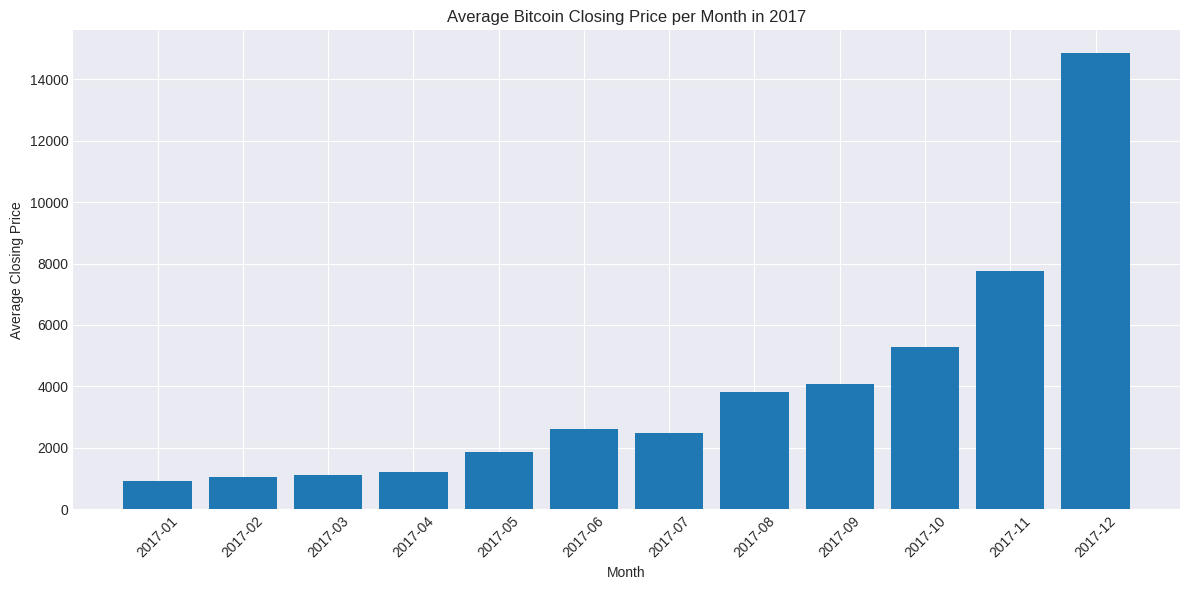

In [20]:
bar_pie_df['month'] = bar_pie_df['date'].dt.to_period('M')
monthly_avg_close = bar_pie_df.groupby('month')['close'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(monthly_avg_close['month'].astype(str), monthly_avg_close['close'])
plt.title("Average Bitcoin Closing Price per Month in 2017")
plt.xlabel("Month")
plt.ylabel("Average Closing Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

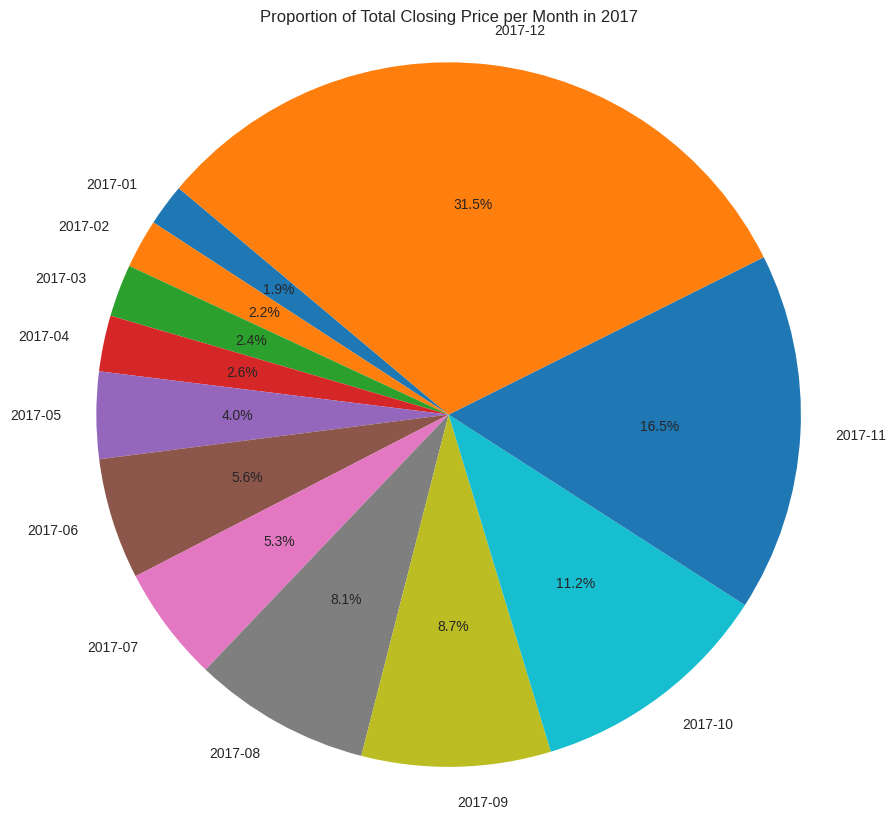

In [22]:
monthly_sum_close = monthly_avg_close.groupby('month')['close'].sum()

plt.figure(figsize=(10, 10))
plt.pie(monthly_sum_close, labels=monthly_sum_close.index.astype(str), autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Total Closing Price per Month in 2017")
plt.axis('equal')
plt.show()